# 0.3 EDA

This notebook explores the filtered data availability statements.

In [2]:
import os

import pandas as pd
import engarde.decorators as ed
import plotly_express as px
import plotly.io as pio

In [3]:
PROJ_ROOT = os.path.join(os.pardir)

In [4]:
# Read the filtered data

@ed.is_shape((None, 6))
def load_data():
    PROJ_ROOT = os.path.join(os.pardir)
    read_path = os.path.join(PROJ_ROOT + '/data/interim/' + 'data_statements.feather')

    df = pd.read_feather(read_path)
    
    return df

In [5]:
filtered_questions = load_data()

In [6]:
filtered_questions.head()

,site_name,documentid,customquestionid,questiontext,answertext,submissiondate
0,mec,23392060,705302,Is the Data Accessibility statement included i...,Yes,2016-08-05 12:35:16
1,ejss,33083742,865261,Please cut and paste your Data Availability St...,Data sharing is not applicable to this article...,2019-04-09 02:13:49
2,mec,34043479,860843,Please cut and paste your Data Availability St...,The T. bicolor genome is archived in GenBank (...,2019-07-12 18:06:21
3,jcmm,34066715,861481,Please cut and paste your Data Availability St...,n/a,2019-07-15 16:05:44
4,jappent,33013368,850605,Please cut and paste your Data Availability St...,DATA ACCESSIBILITY All the data and analysis s...,2019-04-02 07:06:14


In [7]:
filtered_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197899 entries, 0 to 197898
Data columns (total 6 columns):
site_name           197899 non-null object
documentid          197899 non-null object
customquestionid    197899 non-null int64
questiontext        197899 non-null object
answertext          127714 non-null object
submissiondate      191066 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.1+ MB


## What are the most common questions?

In [8]:
grouped_questions = (
    filtered_questions.groupby("questiontext")
    .agg(question_count=("documentid", "count"))
    .sort_values(by="question_count", ascending=False)
    .reset_index()
    .head(20)
)

grouped_questions

,questiontext,question_count
0,Please cut and paste your Data Availability St...,42234
1,I confirm that my article contains a Data Avai...,36374
2,Please cut and paste your Data Availability St...,21888
3,I confirm that my article contains a Data Avai...,18970
4,If your paper is accepted for publication wher...,18578
5,Is the Data Accessibility statement included i...,9005
6,The preliminary Data Accessibility section is ...,7642
7,Data Accessibility section (no word limit),4614
8,Have you included a data availability statemen...,4499
9,"I have added a ""Data Accessibility"" section to...",2952


## How have the answers developed over time?

In [9]:
filtered_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197899 entries, 0 to 197898
Data columns (total 6 columns):
site_name           197899 non-null object
documentid          197899 non-null object
customquestionid    197899 non-null int64
questiontext        197899 non-null object
answertext          127714 non-null object
submissiondate      191066 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.1+ MB


In [10]:
weekly_answers = (
    filtered_questions
    # Drop the row if there is no answer or no date
    .dropna(subset=["answertext", "submissiondate"])
    .set_index("submissiondate")
    # Aggregate by week and count on documentid
    .resample("W")["documentid"]
    .count()
    .reset_index()
    .rename(columns={"documentid": "answers"})
)

weekly_answers["cumulative_answers"] = weekly_answers["answers"].cumsum()
weekly_answers.head()

,submissiondate,answers,cumulative_answers
0,2012-08-05,1,1
1,2012-08-12,0,1
2,2012-08-19,0,1
3,2012-08-26,3,4
4,2012-09-02,10,14


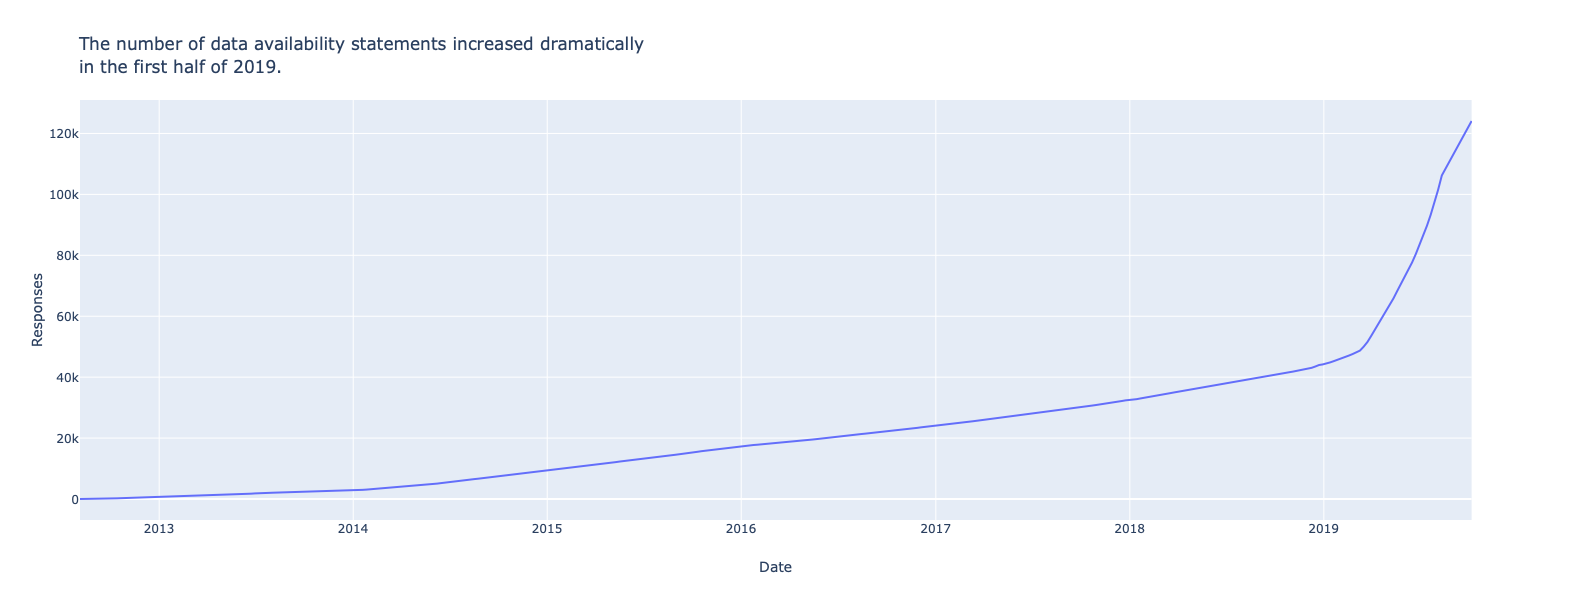

In [18]:
fig = px.line(
    weekly_answers,
    x="submissiondate",
    y="cumulative_answers",
    title="The number of data availability statements increased dramatically<br>in the first half of 2019.",
    width=800,
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Responses")

fig_path = os.path.join(PROJ_ROOT + "/reports/figures/" + "0.3-01-answers_growth")

pio.write_html(fig, fig_path + ".html", include_plotlyjs="cdn")
pio.write_image(fig, fig_path + ".svg")

fig.show()